# Time Series - Lecture 4: Deep Learning for Time Series Forecasting

ARIMA model is well understood and effective in many cases. However, there are cases where ARIMA model is limiting:
1. Missing or corrupt data
2. Non-linear relationships
3. The number of lag observations differ across data
4. Multiple input variables

In such cases, more flexible model can be a better. Today we will learn a few flexible deep learning models. Namely,

1. **Multilayer Perception (MLP)**
2. **Long Short-Term Memory (LSTM) Neural Network**
3. **Convolutional Neural Network (CNN)**


**Data**
- In this lecture, since the models are more complex, we will use a very simple data. 
- Since the Deep Learning models covered today are supervised learning, we need X and Y variables.

In [22]:
from numpy import array
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])

## Multilayer Perception (MLP)
- Neural network is a create a model of the brain
- A neuron has a weighted input signals and produce an output signal using an activation function
- Multiple rows of neurons are arranged into neural networks 

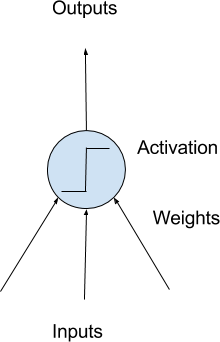

In [35]:
from PIL import Image
Image.open("images/Neuron.png")

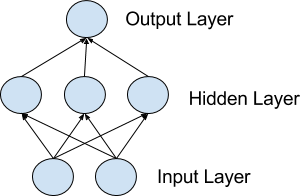

In [36]:
Image.open("images/Network.png")

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[80.097404]]


## Long Short-Term Memory Network (LSTM) 

- Instead of neurons, LSTM networks have **memory blocks** that are connected through layers.
- A block has components that make it smarter* than a classical neuron

*For details on how "smart" each block is, refer [here](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

In [32]:
from keras.layers import LSTM
from keras.layers import Dense
# define dataset
X = array([[10, 20, 30], [20, 30, 40], [30, 40, 50], [40, 50, 60]])
y = array([40, 50, 60, 70])
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[81.16339]]


## Convolutional Neural Network (CNN)
- These networks preserve the spatial structure of the problem
- Developed for object recognition tasks such as handwritten digit recognition
- State-of-the-art results on difficult computer vision and natural language processing tasks

In [27]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [30]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(3, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1000, verbose=0)
# demonstrate prediction
x_input = array([50, 60, 70])
x_input = x_input.reshape((1, 3, 1))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[82.12631]]


# Activities

1. Read the following:
    - https://machinelearningmastery.com/neural-networks-crash-course/
    - https://machinelearningmastery.com/crash-course-convolutional-neural-networks/
    - https://machinelearningmastery.com/crash-course-recurrent-neural-networks-deep-learning/
2. Can you create one of the three models that we have studied today with your data set? Why did you choose a particular model?

# References
- https://machinelearningmastery.com/how-to-get-started-with-deep-learning-for-time-series-forecasting-7-day-mini-course/
- https://machinelearningmastery.com/neural-networks-crash-course/
- https://machinelearningmastery.com/crash-course-convolutional-neural-networks/
- http://colah.github.io/posts/2015-08-Understanding-LSTMs/
